# A comprehensive guide to OCR with Tesseract, OpenCV and Python
Filip Zelic - 16 DEC 2020. [Here](https://nanonets.com/blog/ocr-with-tesseract/). [Code](https://github.com/NanoNets/ocr-with-tesseract/blob/master/tesseract-tutorial.ipynb)

## Introduction

OCR = Optical Character Recognition. In other words, __OCR systems `transform a two-dimensional image of text`, that could contain machine printed or handwritten text from its image representation into machine-readable text__. OCR as a process generally consists of several sub-processes to perform as accurately as possible. The subprocesses are:

- Preprocessing of the Image
- Text Localization
- Character Segmentation
- Character Recognition
- Post Processing

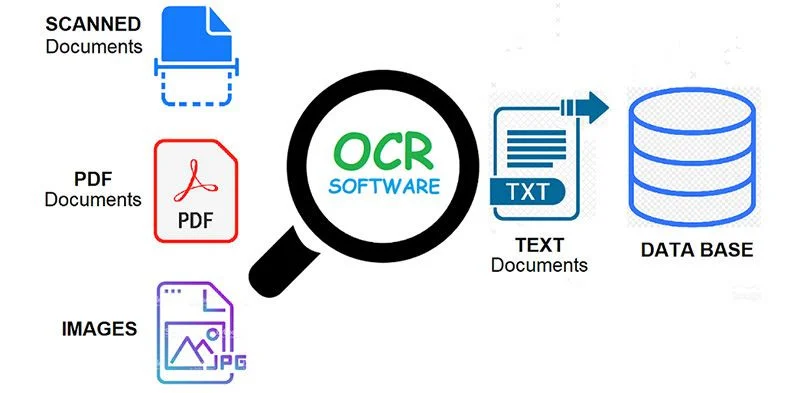

## Comparison of optical character recognition software
[Wikipedia](https://en.wikipedia.org/wiki/Comparison_of_optical_character_recognition_software)

## Tesseract OCR

Tesseract is an open source text recognition (OCR) Engine, available under the Apache 2.0 license. It can be used directly, or (for programmers) using an __API to extract printed text from images__. It supports a wide variety of languages.

It can be used with the existing layout analysis to recognize text within a large document, or it can be used in conjunction with an external text detector to recognize text from an image of a single text line.

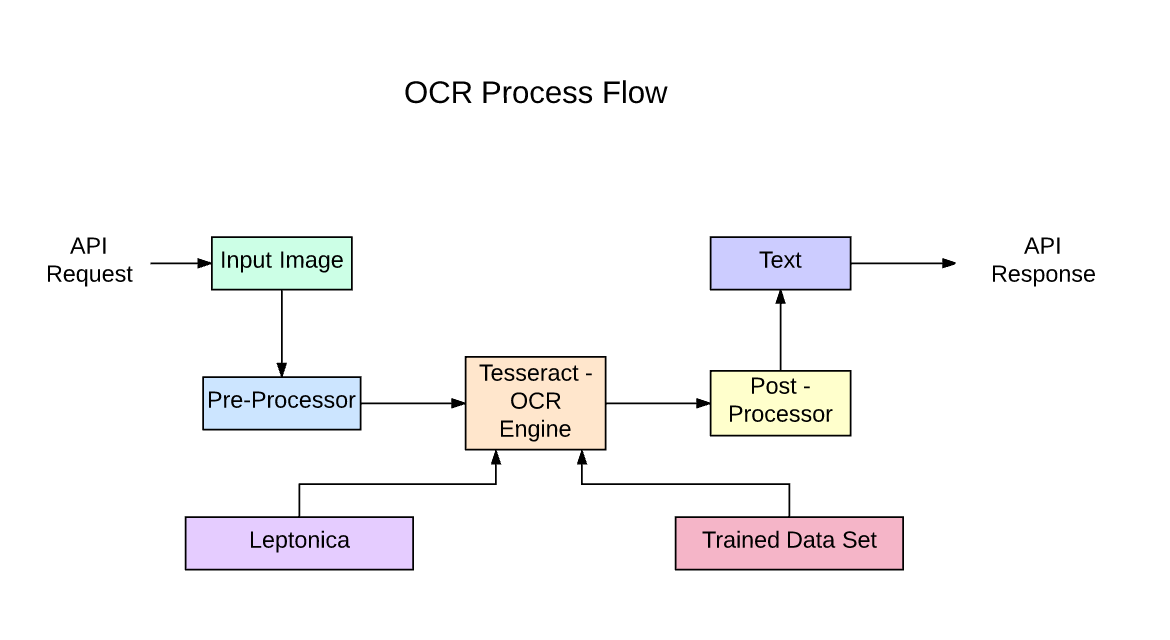

Tesseract 4.00 includes a new neural network subsystem configured as a text line recognizer. [ OCRopus' Python-based LSTM](https://github.com/tmbdev/ocropy)

The neural network system in Tesseract pre-dates TensorFlow but is compatible with it, as there is a network description language called Variable Graph Specification Language (VGSL), that is also available for TensorFlow.

To recognize an image containing a single character, we typically use a Convolutional Neural Network (CNN). Text of arbitrary length is a sequence of characters, and such problems are solved using RNNs and LSTM is a popular form of RNN. 

### Technology - How it works

LSTMs are great at learning sequences but slow down a lot when the number of states is too large. There are empirical results that suggest it is better to ask an LSTM to learn a long sequence than a short sequence of many classes. 

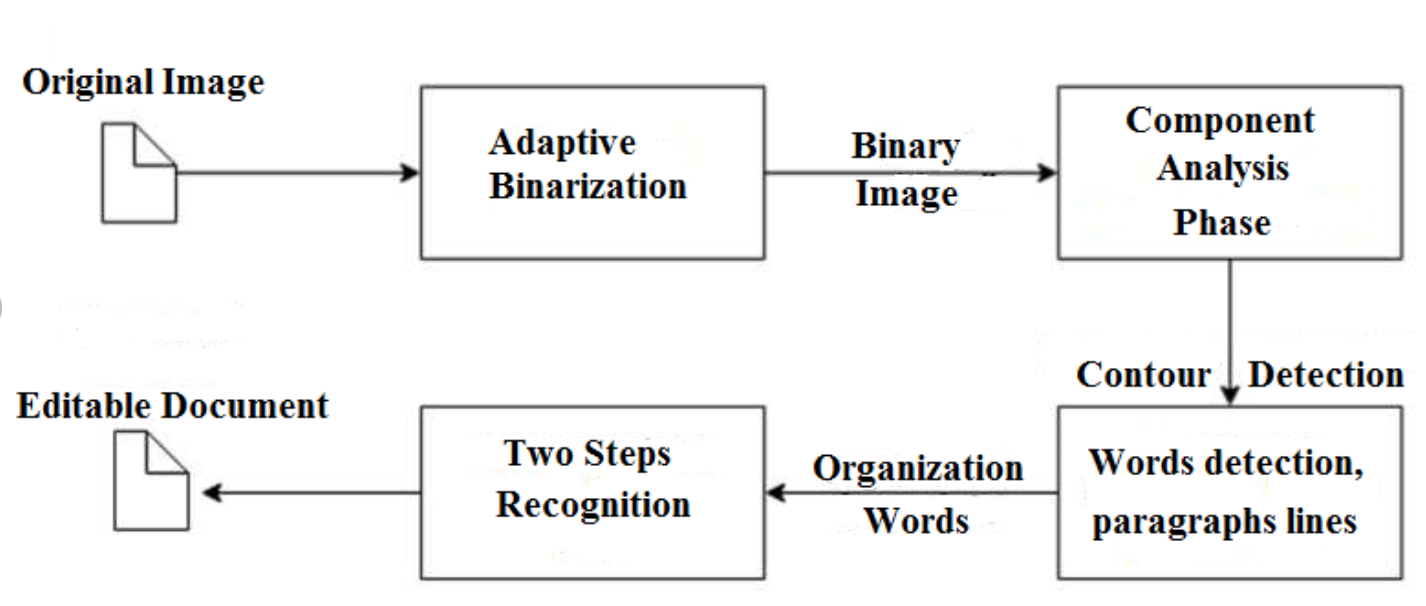

Legacy Tesseract 3.x was dependant on the multi-stage process where we can differentiate steps:
- Word finding
- Line finding
- Character classification

Word finding was done by organizing text lines into blobs, and the lines and regions are analyzed for fixed pitch or proportional text. Text lines are broken into words differently according to the kind of character spacing. Recognition then proceeds as a two-pass process. In the first pass, an attempt is made to recognize each word in turn. Each word that is satisfactory is passed to an adaptive classifier as training data. The adaptive classifier then gets a chance to more accurately recognize text lower down the page.

#### Who Tesseract use LSTMs

Modernization of the Tesseract tool was an effort on code cleaning and adding a new LSTM model. The input image is processed in boxes (rectangle) line by line feeding into the LSTM model and giving output. In the image below we can visualize how it works.

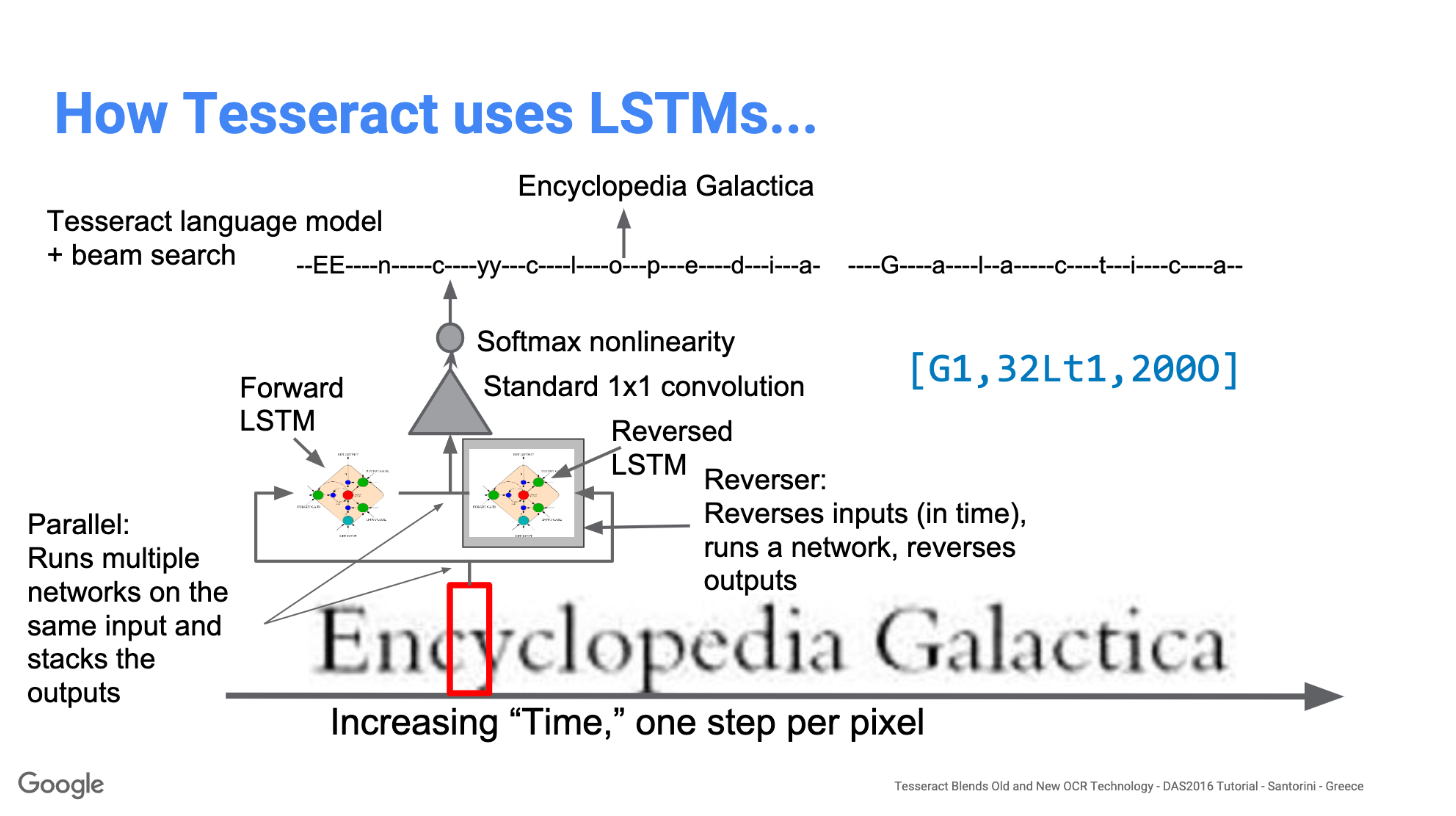

After adding a new training tool and training the model with a lot of data and fonts, Tesseract achieves better performance. Still, __not good enough to work on handwritten text and weird fonts__. 

### Installing Tesseract

- Tesseract. [Here](https://github.com/tesseract-ocr/tesseract/releases). [Windows Installer](https://github.com/UB-Mannheim/tesseract/wiki)

### Running Tesseract with CLI

- Verify that everything is working by typing command in the terminal

```
C:\Program Files\Tesseract-OCR> tesseract.exe --version
```


- Call the Tesseract engine on the image with image_path and convert image to text

```
C:\...OCR> tesseract.exe image_path stdout
```

- Write the output text in a file
```
C:\...OCR> tesseract.exe image_path text_result.txt
```

- Specify the language model name, write language shortcut after -l flag, by default it takes English language:

```
C:\...OCR> tesseract.exe image_path text_result.txt -l eng
```

- By default, Tesseract expects a page of text when it segments an image. If you're just seeking to OCR a small region, try a different segmentation mode, using the --psm argument. There are 14 modes available which can be found [here](https://github.com/tesseract-ocr/tesseract/wiki).

```
C:\...OCR> tesseract.exe image_path text_result.txt -l eng --psm 6
```

- There is also one more important argument, OCR engine mode (oem). Tesseract 4 has two OCR engines — Legacy Tesseract engine and LSTM engine. There are four modes of operation chosen using the --oem option.
    - 0    Legacy engine only.
    - 1    Neural nets LSTM engine only.
    - 2    Legacy + LSTM engines.
    - 3    Default, based on what is available.

```
C:\...OCR> tesseract.exe image_path text_result.txt -l eng --psm 6 --oem 0
```

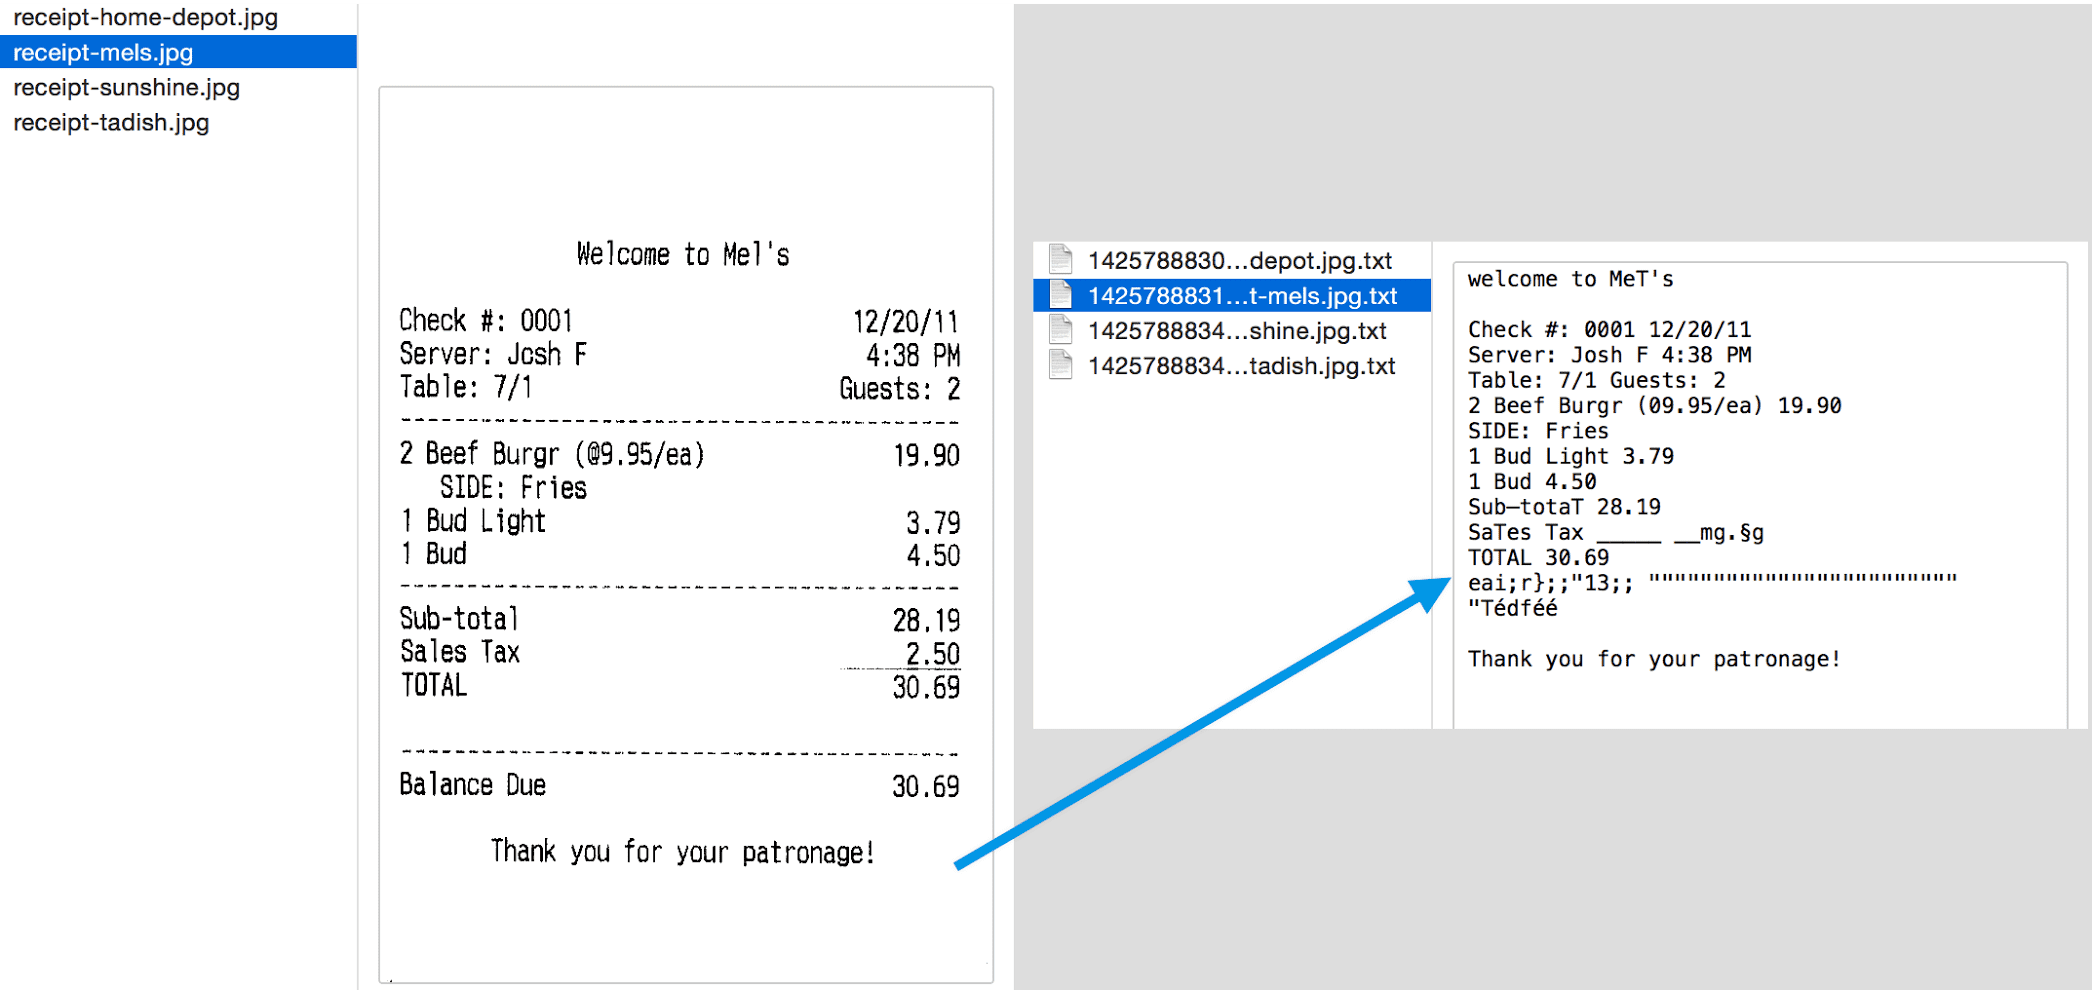

## OCR with Pytesseract and OpenCV

Pytesseract is a __wrapper for Tesseract-OCR Engine__. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the `Pillow` and `Leptonica` imaging libraries, including `jpeg`, `png`, `gif`, `bmp`, `tiff`, and others. More info about Python approach read [here](https://github.com/madmaze/pytesseract). The code for this tutorial can be found in this repository.

```
import cv2 
import pytesseract

img = cv2.imread('image.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'

pytesseract.image_to_string(img, config=custom_config)
```

### Preprocessing for Tesseract
To __avoid all the ways your tesseract output accuracy can drop__, you need to make sure the image is appropriately pre-processed.

This includes `rescaling`, `binarization`, `noise removal`, `deskewing`, etc.

To preprocess image for OCR, use any of the following python functions or follow the OpenCV documentation.
- [Welcome to OpenCV-Python Tutorials’s documentation!](https://opencv-python-tutroals.readthedocs.io/en/latest/index.html)
- [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
- [Image Processing in OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)


In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
# Mention the installed location of Tesseract-OCR in your system 
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
IMG_DIR = 'images/'

#### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods 
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching. 

Different methods can come in handy with different kinds of images. 

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

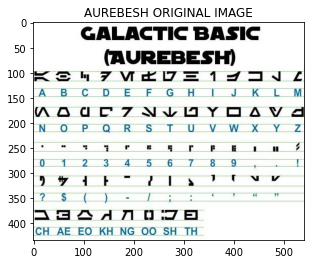

In [5]:
# Plot original image

image = cv2.imread(IMG_DIR + 'aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [6]:
# Preprocess image 

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

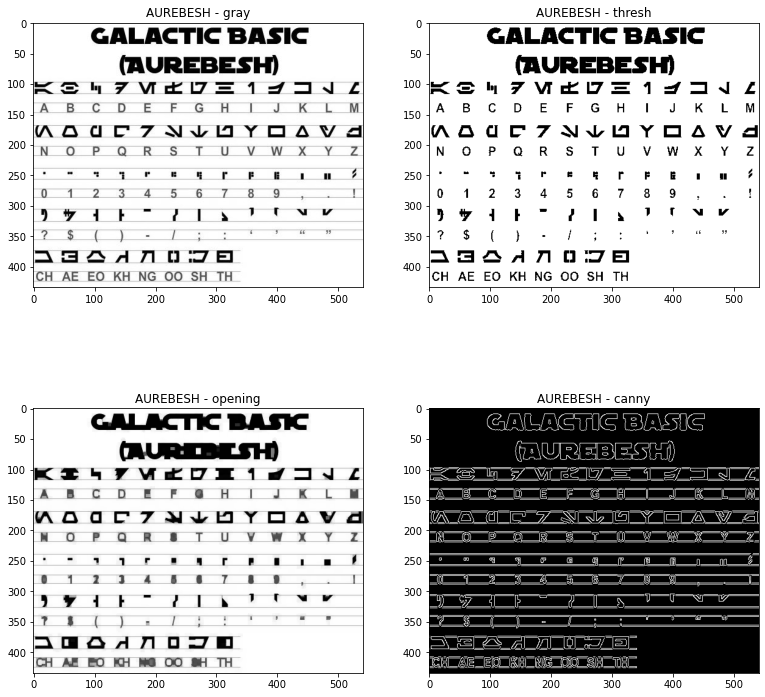

In [7]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')   

In [8]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
a a a v2
a Se ae: a, |
i a a Sy ee ee ee
a (a aS
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
a a a v2
a Se ae: a, |
i a a Sy ee ee ee
a (a aS
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
a a a v2
a Se ae: a, |
i a a Sy ee ee ee
a (a aS
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------


#### Bounding box information using Pytesseract

While running and image through the tesseract OCR engine, pytesseract allows you to get bounding box imformation 
- on a character level
- on a word level
- based on a regex template

We will see how to obtain both

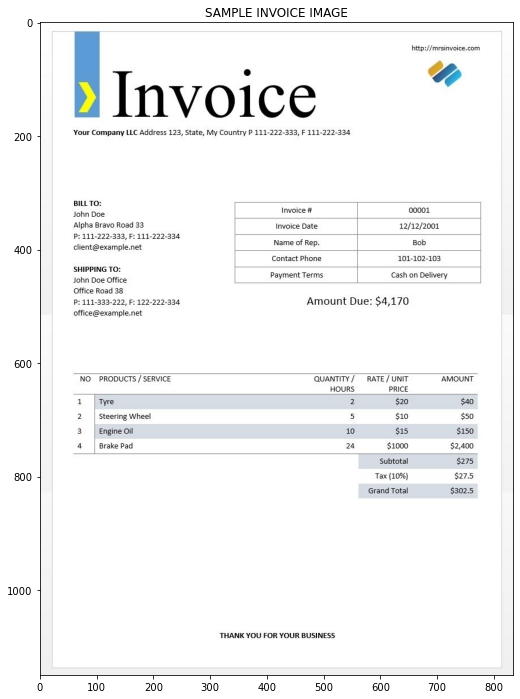

In [9]:
# Plot original image

image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

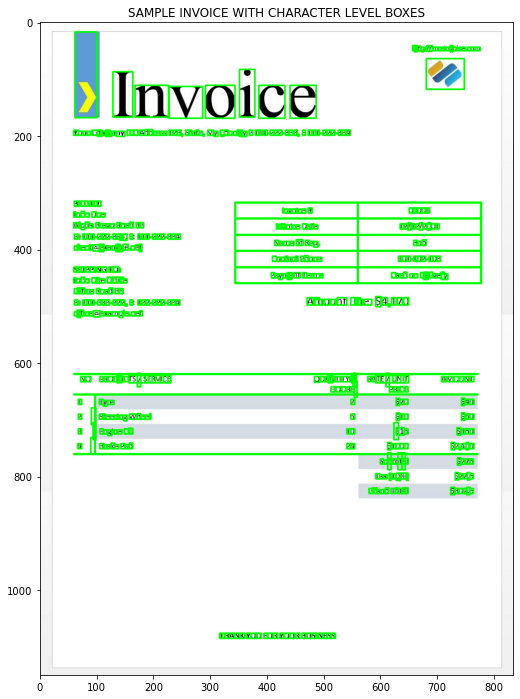

In [10]:
# Plot character boxes on image using pytesseract.image_to_boxes() function

image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

If you want boxes around words instead of characters, the function image_to_data will come in handy. You can use the image_to_data function with output type specified with pytesseract Output.

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


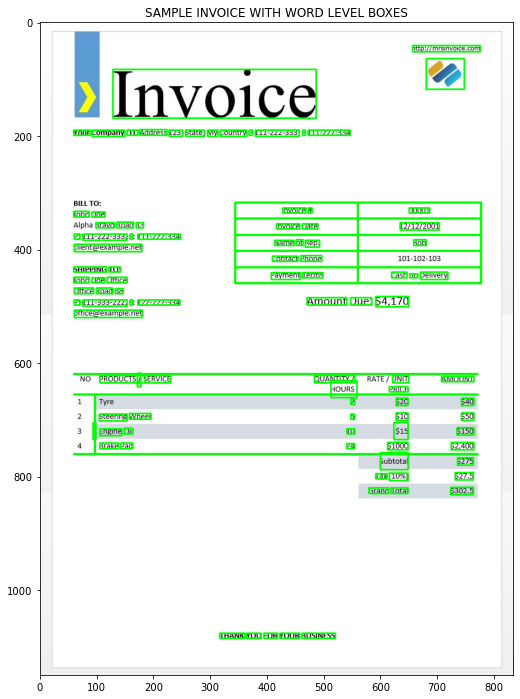

In [11]:
# Plot word boxes on image using pytesseract.image_to_data() function

image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

This should give you the following output -
```
dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
```

Using this dictionary, we can get each word detected, their bounding box information, the text in them and the confidence scores for each.

You can plot the boxes by using the code below -

#### Text template matching
Take the example of trying to find where a date is in an image. Here our template will be a regular expression pattern that we will match with our OCR results to find the appropriate bounding boxes. We will use the regex module and the image_to_data function for this.

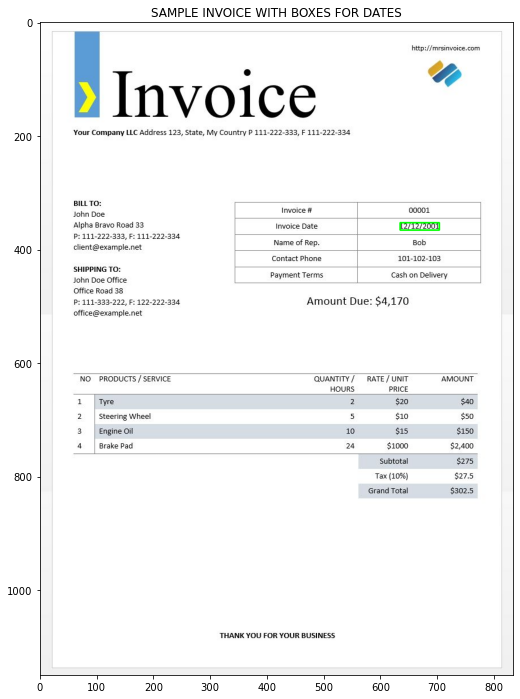

In [12]:
# Plot boxes around text that matches a certain regex template
# In this example we will extract the date from the sample invoice

image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH BOXES FOR DATES')
plt.show()

#### Page segmentation modes

There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

- 0    Orientation and script detection (OSD) only.
- 1    Automatic page segmentation with OSD.
- 2    Automatic page segmentation, but no OSD, or OCR.
- 3    Fully automatic page segmentation, but no OSD. (Default)
- 4    Assume a single column of text of variable sizes.
- 5    Assume a single uniform block of vertically aligned text.
- 6    Assume a single uniform block of text.
- 7    Treat the image as a single text line.
- 8    Treat the image as a single word.
- 9    Treat the image as a single word in a circle.
- 10    Treat the image as a single character.
- 11    Sparse text. Find as much text as possible in no particular order.
- 12    Sparse text with OSD.
- 13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

To change your page segmentation mode, change the `--psm argument` in your custom config string to any of the above mentioned mode codes.



### Detect orientation and script

You can detect the orientation of text in your image and also the script in which it is written. 

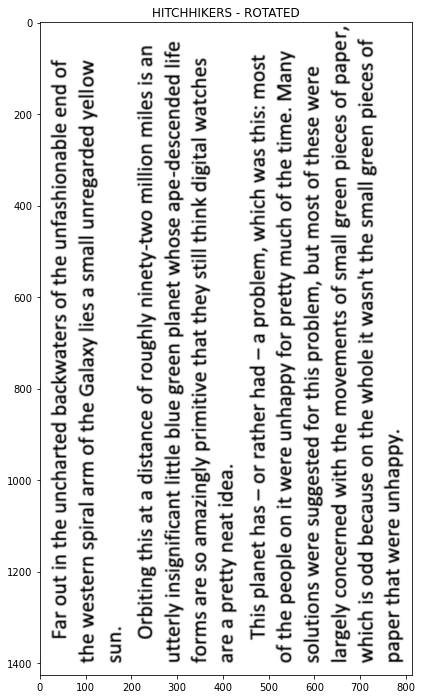

In [13]:
# Plot original image

image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('HITCHHIKERS - ROTATED')
plt.show()

In [14]:
# Get angle and script

osd = pytesseract.image_to_osd(image)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\w+', osd).group(0)
print("angle: ", angle)
print("script: ", script)

angle:  90
script:  Latin


### Playing around with the config

By making minor changes in the config file you can 
- specify language
- detect only digits
- whitelist characters
- blacklist characters
- work with multiple languages

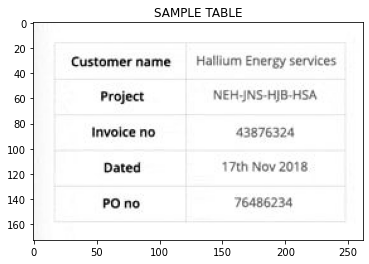

In [15]:
# Plot original image

image = cv2.imread(IMG_DIR + 'digits-task.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SAMPLE TABLE')
plt.show()

The text extracted from this image looks like this.

In [16]:
# Original tesseract output with english language sepcified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234



#### Detect only digits

ou can recognise only digits by changing the config to the following

In [17]:
# Output with outputbase digits

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(image, config=custom_config))

--
. 43876324

172018.

0 176496234



#### Whitelisting characters

Say you only want to detect certain characters from the given image and ignore the rest. You can specify your whitelist of characters (here, we have used all the lowercase characters from a to z only) by using the following config.

In [18]:
# Output with a whitelist of characters (here, we have used all the lowercase characters from a to z only)

custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

customernamealiumnergyservices
roject e
lavoiceno
ated thov
ono



#### Blacklisting characters

If you are sure some characters or expressions definitely will not turn up in your text (the OCR will return wrong text in place of blacklisted characters otherwise), you can blacklist those characters by using the following config.

In [19]:
# Output without the blacklisted characters (here, we have removed all digits)

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no ¢
Dated %h Nov%.
POno



#### Detect in multiple languages
You can check the languages available by typing this in the terminal

```
C:\...OCR> tesseract.exe --list-langs
```

To download tesseract for a specific language use

```
$ sudo apt-get install tesseract-ocr-LANG
```

where LANG is the three letter code for the language you need. You can find out the LANG values [here](https://github.com/tesseract-ocr/tessdata).

You can download the `.traindata` file for the language you need from here and place it in `$TESSDATA_PREFIX` directory (this should be the same as where the `tessdata` directory is installed) and it should be ready to use.

__Note__. - Only languages that have a `.traineddata` file format are supported by tesseract.

To specify the language you need your OCR output in, use the `-l LANG` argument in the config where LANG is the 3 letter code for what language you want to use.

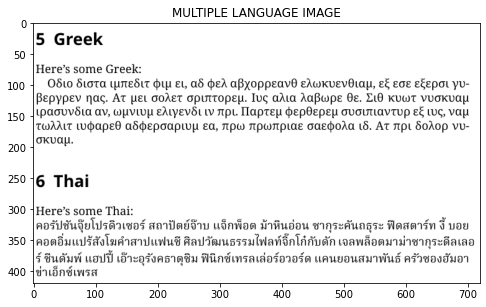

In [20]:
# working with multiple languages

# Plot original image

image = cv2.imread(IMG_DIR + 'greek-thai.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(8,16))
plt.imshow(rgb_img, cmap = 'gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [21]:
# Output with only english language specified

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



In [22]:
# Output with all languages specified

custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

06 เ 0 διστα ιμπεδιτ แน ει, ๕ 6 ea αβχορρεανθ ελωκυενθιαμ, εξ εσε εξερσι yu-
βεργρεν ท ุ ต 6. AT μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. LO κυωτ νυσκυαμ
เถ ต ฮ บ ง 6 เ ๕ αν, ง น บ เข น ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ ιυς,ναμ
τωλλιτ เง ๑ ๕ 80 ๕ 6 ๑ อ 06 ส 0 เง น Ea, TOW πρωπριαε σαεφολα เอ . AT πρι δολορ ห บ -
σκυαμ.

6 Thai

Here’s some Thai: ν᾿

ค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย
ค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ด ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ
ร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า
ข่ า เอ ็ ก ซ์ เพ ร ส



Note - The language specified first to the -l parameter is the primary language.

Unfortunately tesseract does not have a feature to detect language of the text in an image automatically. An alternative solution is provided by another python module called langdetect which can be installed via pip.

``
pip install langdetect
``

This module again, does not detect the language of text using an image but needs string input to detect the language from. The best way to do this is by first using tesseract to get OCR text in whatever languages you might feel are in there, using langdetect to find what languages are included in the OCR text and then run OCR again with the languages found.

Say we have a text we thought was in english and portugese.

```
custom_config = r'-l eng+por --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[en:0.714282468983554, es:0.2857145605644145]
```


The language codes used by langdetect follow ISO 639-1 codes. To compare, please check [this](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes) and [this](https://github.com/tesseract-ocr/tesseract/wiki/Data-Files). We find that the language used in the text are english and spanish instead.

We get the text again by changing the config to

```
custom_config = r'-l eng+spa --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)
```

__Note__. - Tesseract performs badly when, in an image with multiple languages, the languages specified in the config are wrong or aren't mentioned at all. This can mislead the langdetect module quite a bit as well.

#### Using tessdata_fast

If speed is a major concern for you, you can replace your tessdata language models with tessdata_fast models which are 8-bit integer versions of the tessdata models.

According to the tessdata_fast [github](https://github.com/tesseract-ocr/tessdata_fast)

This repository contains fast integer versions of trained models for the [Tesseract Open Source OCR Engine](https://github.com/tesseract-ocr/tesseract).

These models only work with the LSTM OCR engine of Tesseract 4.

- These are a speed/accuracy compromise as to what offered the best "value for money" in speed vs accuracy.
- For some languages, this is still best, but for most not.
- The "best value for money" network configuration was then integerized for further speed.
- Most users will want to use these traineddata files to do OCR and these will be shipped as part of Linux distributions eg. Ubuntu 18.04.
- Fine tuning/incremental training will __NOT__ be possible from these fast models, as they are 8-bit integer.
- When using the models in this repository, only the new LSTM-based OCR engine is supported. The legacy tesseract engine is not supported with these files, so Tesseract's oem modes '0' and '2' won't work with them.

To use `tessdata_fast` models instead of `tessdata`, all you need to do is download your `tessdata_fast` language data file from [here](https://github.com/tesseract-ocr/tesseract/wiki/Data-Files) and place it inside your `$TESSDATA_PREFIX` directory.

### Training Tesseract on custom data
Tesseract 4.00 includes a new neural network-based recognition engine that delivers significantly higher accuracy on document images. Neural networks require significantly more training data and train a lot slower than base Tesseract. __For Latin-based languages, the existing model data provided has been trained on about 400000 text lines spanning about 4500 fonts__.

n order to successfully run the Tesseract 4.0 LSTM training tutorial, you need to have a working installation of Tesseract 4 and Tesseract 4 Training Tools and also have the training scripts and required trained data files in certain directories. Visit github repo for files and tools.

Tesseract 4.00 takes a few days to a couple of weeks for training from scratch. Even with all these new training data, therefore here are few options for training:

- __Fine-tune__ - Starting with an existing trained language, train on your specific additional data. For example training on a handwritten dataset and some additional fonts.

- __Cut off the top layer__ - from the network and retrain a new top layer using the new data. If fine-tuning doesn't work, this is most likely the next best option. The analogy why is this useful, take for an instance models trained on ImageNet dataset. The goal is to build a cat or dog classifier, lower layers in the model are good at low-level abstraction as corners, horizontal and vertical lines, but higher layers in model are combining those features and detecting cat or dog ears, eyes, nose and so on. By retraining only top layers you are using knowledge from lower layers and combining with your new different dataset.

- __Retrain from scratch__ - This is a very slow approach unless you have a very representative and sufficiently large training set 
for your problem. The best resource for training from scratch is following this github repo.


- Tess4training. [github](https://github.com/Shreeshrii/tess4training)

A guide on how to train on your custom data and create .traineddata files can be found [here](https://www.endpoint.com/blog/2018/07/09/training-tesseract-models-from-scratch), [here](https://pretius.com/how-to-prepare-training-files-for-tesseract-ocr-and-improve-characters-recognition/) and [here](https://medium.com/@vovaprivalov/tesseract-ocr-tips-custom-dictionary-to-improve-ocr-d2b9cd17850b).



### Limitations of Tesseract

Tesseract works best when there is a clean segmentation of the foreground text from the background. In practice, it can be extremely challenging to guarantee these types of setup. There are a variety of reasons you might not get good quality output from Tesseract like if the image has noise on the background. The better the image quality (size, contrast, lightning) the better the recognition result. It requires a bit of preprocessing to improve the OCR results, images need to be scaled appropriately, have as much image contrast as possible, and the text must be horizontally aligned. Tesseract OCR is quite powerful but does have the following limitations.

#### Tesseract limitations summed in the list.

- The OCR is not as accurate as some commercial solutions available to us.
- Doesn't do well with images affected by artifacts including partial occlusion, distorted perspective, and complex background.
- It is not capable of recognizing handwriting.
- It may find gibberish and report this as OCR output.
- If a document contains languages outside of those given in the -l LANG arguments, results may be poor.
- It is not always good at analyzing the natural reading order of documents. For example, it may fail to recognize that a document contains two columns, and may try to join text across columns.
- Poor quality scans may produce poor quality OCR.
- It does not expose information about what font family text belongs to.